## Assignment 3 Solution


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load datasets
classification_data = pd.read_csv("A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705 (1).csv")
regression_data = pd.read_csv("A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv")
classification_data.head(), regression_data.head()


(   Feature1  Feature2  Label
 0  0.911100 -0.499137    0.0
 1 -1.460326 -0.681642    0.0
 2 -1.063950 -1.106004    0.0
 3  1.723053  1.159836    1.0
 4 -1.078729  1.067450    0.0,
    Samples  Feature 1  Feature 2  Output
 0        1        0.7      48000       1
 1        2        1.9      48000       0
 2        3        2.5      60000       1
 3        4        4.2      63000       0
 4        5        6.0      76000       0)

### Part 1: Binary Classification Tree

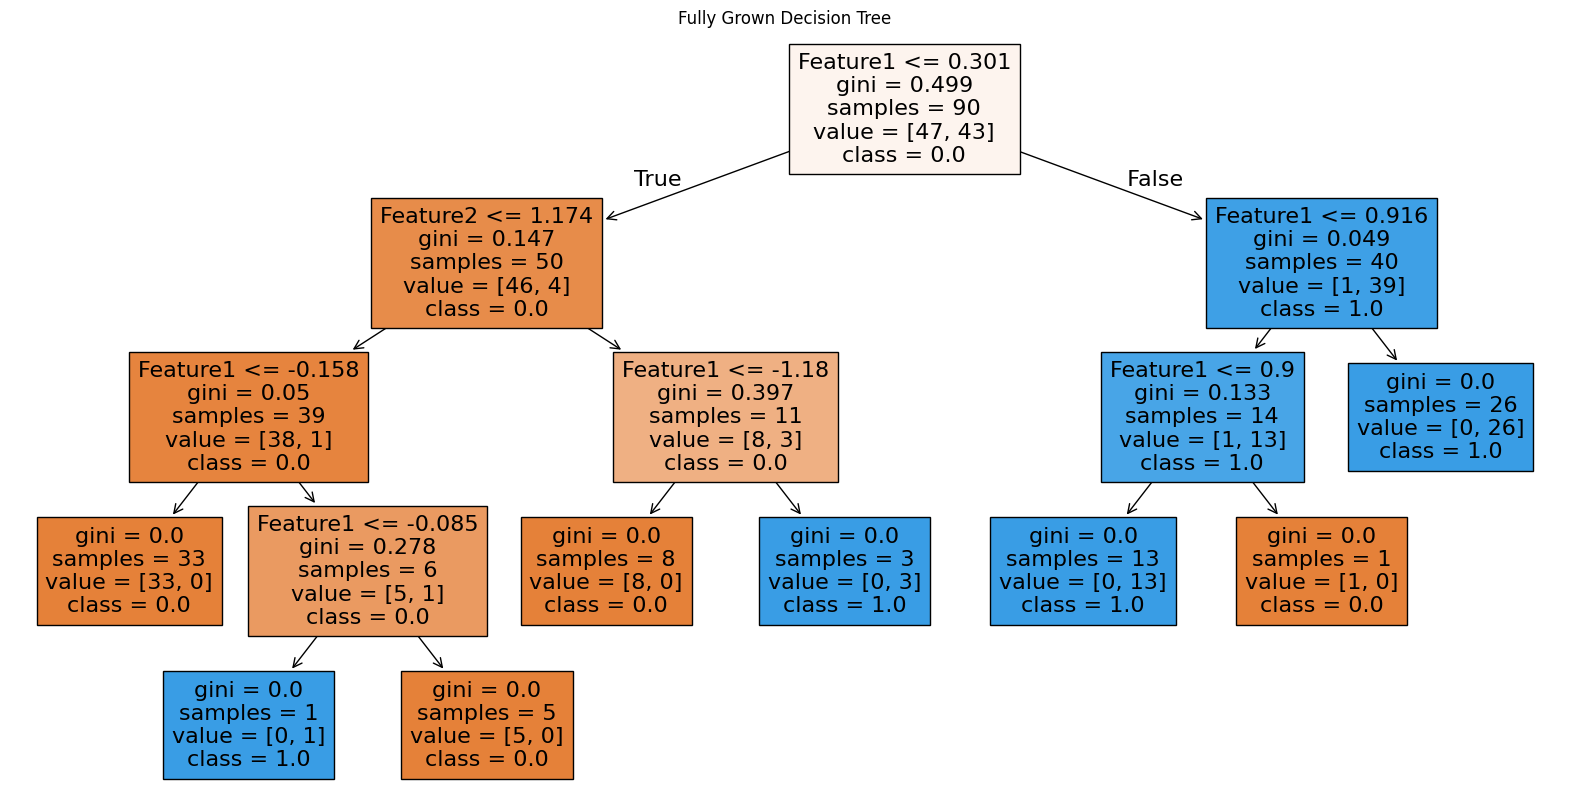

In [ ]:

X_class = classification_data.iloc[:, :-1]
y_class = classification_data.iloc[:, -1]


tree_full = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_full.fit(X_class, y_class)


plt.figure(figsize=(20,10))
plot_tree(tree_full, filled=True, feature_names=X_class.columns, class_names=[str(c) for c in np.unique(y_class)])
plt.title("Fully Grown Decision Tree")
plt.show()


#### SSE vs Depth

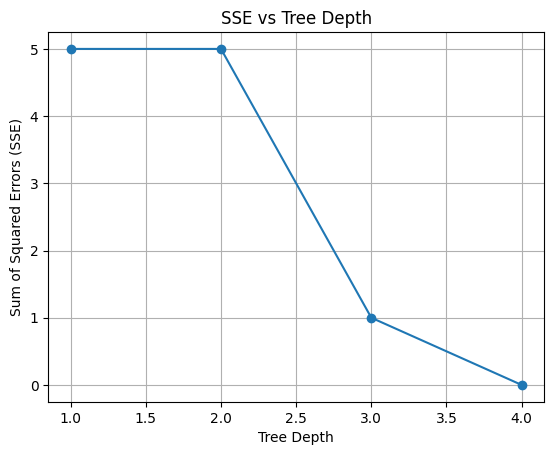

In [ ]:


max_depth = tree_full.get_depth()
sse_values = []
depths = range(1, max_depth+1)

for d in depths:
    tree_pruned = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=42)
    tree_pruned.fit(X_class, y_class)
    y_pred = tree_pruned.predict(X_class)
    sse = np.sum((y_class - y_pred)**2)
    sse_values.append(sse)


plt.plot(depths, sse_values, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("SSE vs Tree Depth")
plt.grid()
plt.show()


#### Pruned Tree Visualization

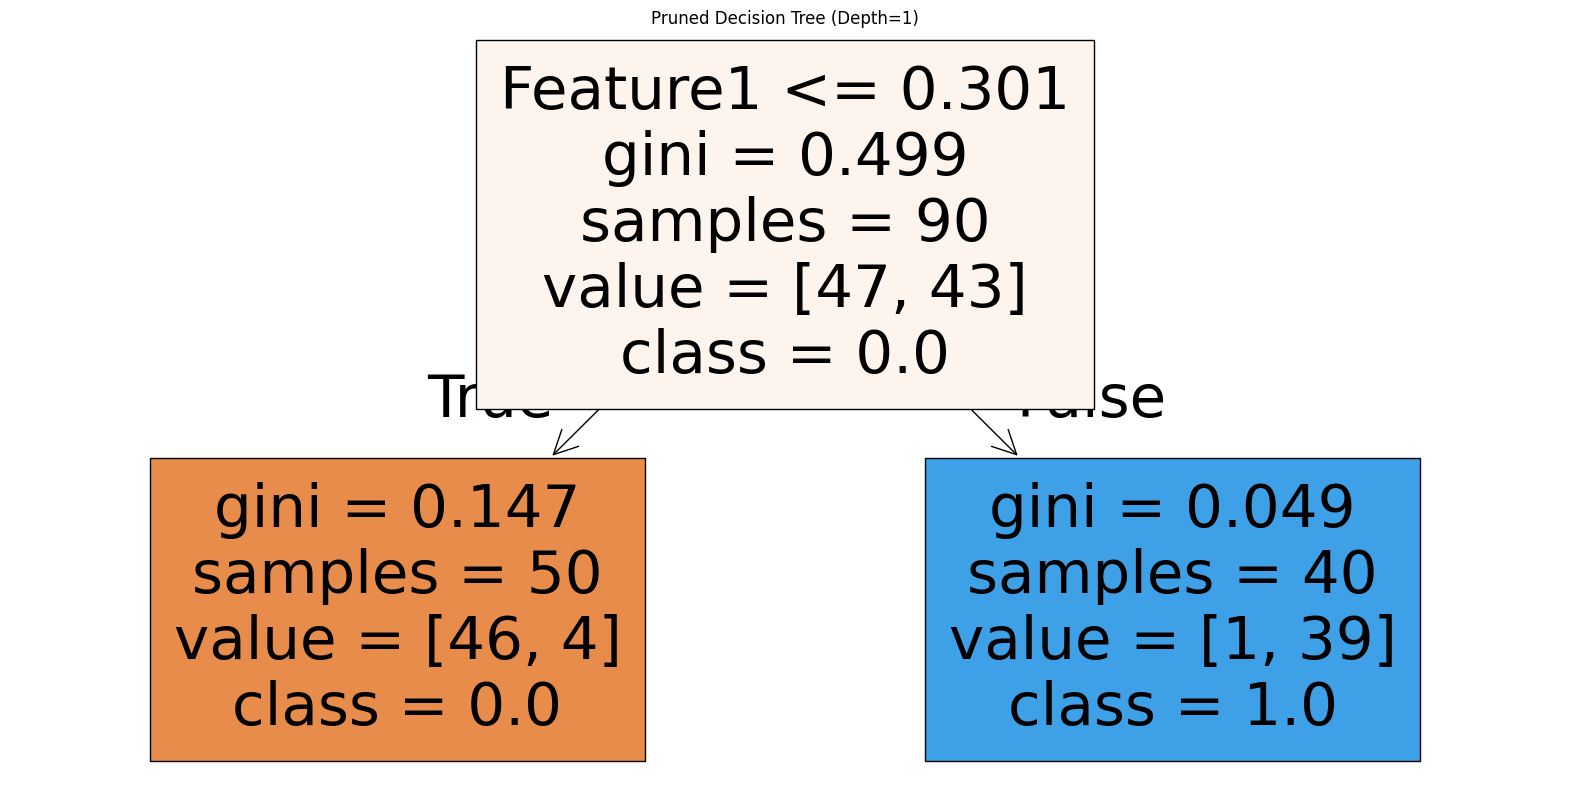

In [5]:


sse_diff = np.diff(sse_values)
optimal_depth = np.argmin(np.abs(sse_diff)) + 1


tree_pruned_optimal = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
tree_pruned_optimal.fit(X_class, y_class)

plt.figure(figsize=(20,10))
plot_tree(tree_pruned_optimal, filled=True, feature_names=X_class.columns, class_names=[str(c) for c in np.unique(y_class)])
plt.title(f"Pruned Decision Tree (Depth={optimal_depth})")
plt.show()


### Part 2: Linear Regression

In [6]:

X_reg = regression_data.iloc[:, :-1]
y_reg = regression_data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Linear Regression): {mse}")


Mean Squared Error (Linear Regression): 0.10802219762197378


#### Plot MSE and Feature Coefficients

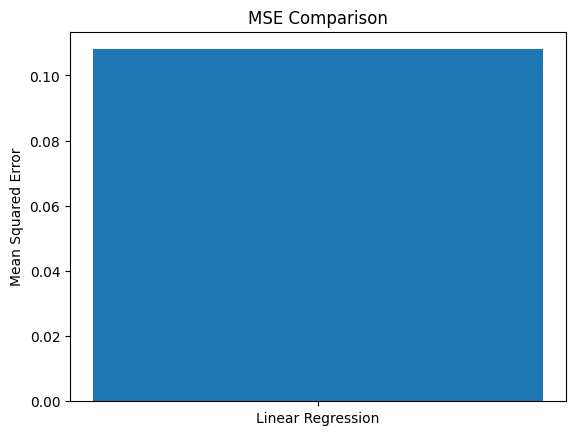

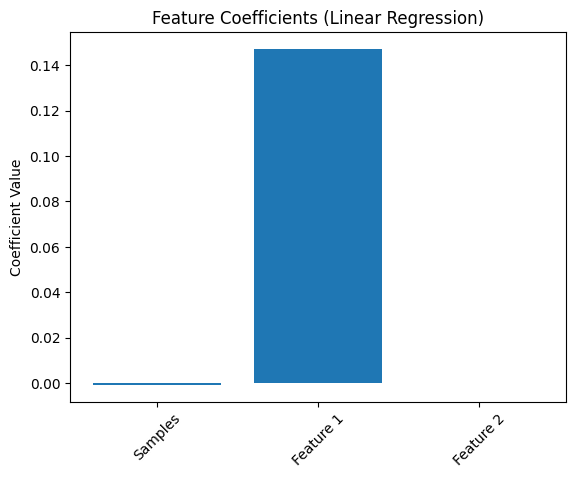

In [7]:


plt.bar(['Linear Regression'], [mse])
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison")
plt.show()

plt.bar(X_reg.columns, lin_reg.coef_)
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients (Linear Regression)")
plt.xticks(rotation=45)
plt.show()
